In [1]:
# Adapted from https://github.com/pytorch/vision/blob/v0.4.0/torchvision/models/resnet.py
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.data import AUTOTUNE

img_height = 256
img_width = 256
image_dir = "images_multinomial"
batch_size = 32


2023-03-12 18:44:48.271401: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    image_dir,
    validation_split=0.2,
    labels="inferred",
    label_mode="categorical",
    class_names=["Australia", "Austria", "Czechia", "New Zealand", "Slovakia"],
    subset="both",
    seed = 0,
    batch_size = batch_size,
    crop_to_aspect_ratio=True,
    image_size=(img_height, img_width))


Found 55053 files belonging to 5 classes.
Using 44043 files for training.
Using 11010 files for validation.


In [3]:
model = keras.Sequential(
    [
    layers.Conv2D(32, (3,3), input_shape = (img_height,img_width,3), activation = "relu", padding="same"),
    layers.MaxPooling2D((2,2), padding="same"),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3,3), activation = "relu", padding="same"),
    layers.MaxPooling2D((2,2), padding="same"),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3,3), activation = "relu", padding="same"),
    layers.MaxPooling2D((2,2), padding="same"),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3,3), activation = "relu", padding="same"),
    layers.MaxPooling2D((2,2), padding="same"),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3,3), activation = "relu", padding="same"),
    layers.MaxPooling2D((2,2), padding="same"),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3,3), activation = "relu", padding="same"),
    layers.MaxPooling2D((2,2), padding="same"),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(100),
    layers.Dropout(0.1),
    layers.Dense(5, activation = 'softmax'),
    ])

optimizer = optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics = ["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [5]:
def standardize_image(image, label):
    mean = tf.reduce_mean(image)
    std = tf.math.reduce_std(image)
    standardized_image = tf.map_fn(lambda x: (x - mean)/std, image)
    return (standardized_image, label)

train_ds =  train_ds.map(standardize_image)
val_ds = val_ds.map(standardize_image)


train_ds = train_ds.prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size = AUTOTUNE)


In [6]:
history = model.fit(train_ds, epochs = 20, validation_data = val_ds)

Epoch 1/20
1377/1377 [==============================] - 1263s 916ms/step - loss: 1.2947 - accuracy: 0.4467 - val_loss: 1.1247 - val_accuracy: 0.5398
Epoch 2/20
1377/1377 [==============================] - 1222s 887ms/step - loss: 1.0419 - accuracy: 0.5709 - val_loss: 0.9724 - val_accuracy: 0.6016
Epoch 3/20
1377/1377 [==============================] - 1232s 894ms/step - loss: 0.9306 - accuracy: 0.6178 - val_loss: 0.8941 - val_accuracy: 0.6298
Epoch 4/20
1377/1377 [==============================] - 1239s 899ms/step - loss: 0.8796 - accuracy: 0.6428 - val_loss: 0.8580 - val_accuracy: 0.6490
Epoch 5/20
1377/1377 [==============================] - 1234s 895ms/step - loss: 0.8360 - accuracy: 0.6591 - val_loss: 0.8024 - val_accuracy: 0.6686
Epoch 6/20
1377/1377 [==============================] - 1227s 890ms/step - loss: 0.7978 - accuracy: 0.6761 - val_loss: 0.7527 - val_accuracy: 0.6946
Epoch 7/20
1377/1377 [==============================] - 1232s 894ms/step - loss: 0.7666 - accuracy: 0.6907

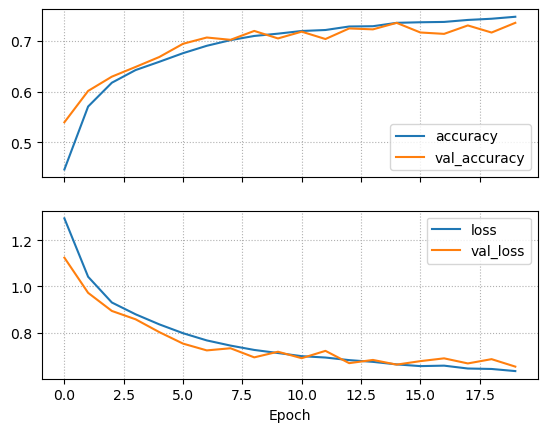

In [7]:
fig, axs = plt.subplots(2,1, sharex = True)
keys = [["accuracy", "val_accuracy"], ["loss", "val_loss"]]
for (ax, k) in zip(axs,keys):
    for key in k:
        ax.plot(history.history[key], label = key)
    
    ax.legend()
    ax.grid(linestyle = "dotted")

plt.xlabel("Epoch")
plt.show()

In [8]:
model.save('multinomial_neural_net')

INFO:tensorflow:Assets written to: multinomial_neural_net/assets


INFO:tensorflow:Assets written to: multinomial_neural_net/assets
